## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.


In [1]:
# for the 1st step -> we can't actually get more data unless w artificially create it


# model_1, model_2, model_3 -> that is what we usually do
# create a base model and keep changing on paramiteer at a time we the results

In [2]:
import tensorflow as tf

tf.__version__

'2.18.0'

In [3]:
X = tf.range(-100, 100, 4)
y = X + 10

# split the data into test and train
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

## Build `model_1`

In [6]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.5323 - mae: 9.5323
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.0961 - mae: 11.0961
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.6191 - mae: 7.6191
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.2705 - mae: 10.2705
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.0492 - mae: 12.0492
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.6501 - mae: 12.6501
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1697 - mae: 8.1697
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.8226 - mae: 8.8226
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.7751 - mae: 7.7751
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.7386 - mae: 10.7386
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.5814 - mae: 7.5814
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9121 - mae: 11.9121
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [22]:
import matplotlib.pyplot as plt

def plot_prediction(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_label, c="b", label="trainning data")
  plt.scatter(test_data, test_label, c="g", label="test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()
  # return


In [7]:
y_preds_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [8]:
y_preds_1

array([[57.825157],
       [61.58542 ],
       [65.34568 ],
       [69.10594 ],
       [72.8662  ],
       [76.626465],
       [80.38672 ],
       [84.14698 ],
       [87.90724 ],
       [91.6675  ]], dtype=float32)

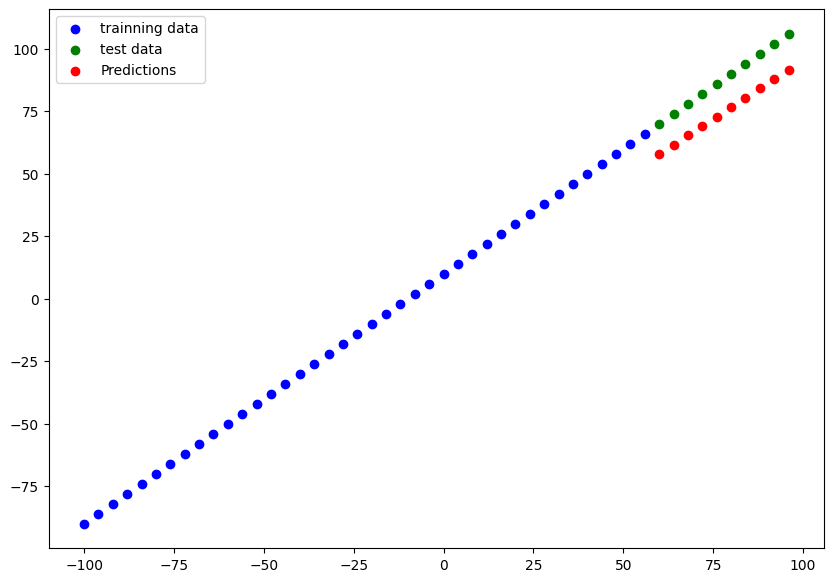

In [10]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds_1) # not soo good

In [12]:
def mae(y_true, y_pred):
  return tf.keras.losses.mae(
      tf.squeeze(y_true),
      tf.squeeze(y_pred)
  )

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(
      tf.squeeze(y_true),
      tf.squeeze(y_pred)
  )

In [54]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.253667831420898>,
 <tf.Tensor: shape=(), dtype=float32, numpy=176.1339111328125>)

## Build `model_2`
- 2 dense layers

In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 47.9419 - mse: 3400.0093 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.5219 - mse: 177.8282
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.1388 - mse: 326.3404
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.2535 - mse: 277.4922
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.5355 - mse: 240.5890
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.9915 - mse: 420.2492
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6739 - mse: 123.7191
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.7643 - mse: 129.5967
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8737 - mse: 160.5681
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.0193 - mse: 217.9587
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.5018 - mse: 344.9055
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.1187 - mse: 118.4646
Epoch 13/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


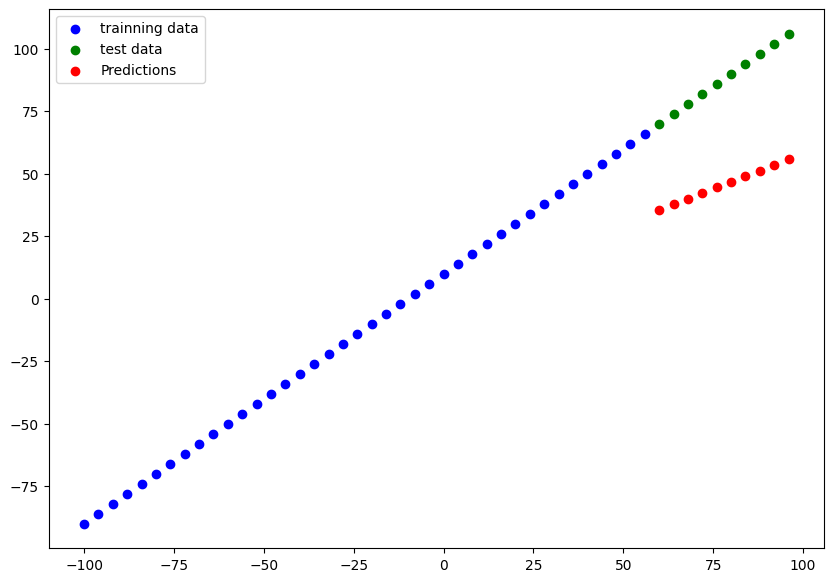

In [29]:
# make and plot prediction
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [56]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=42.337982177734375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1818.07421875>)

## Build `model_3`

In [53]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


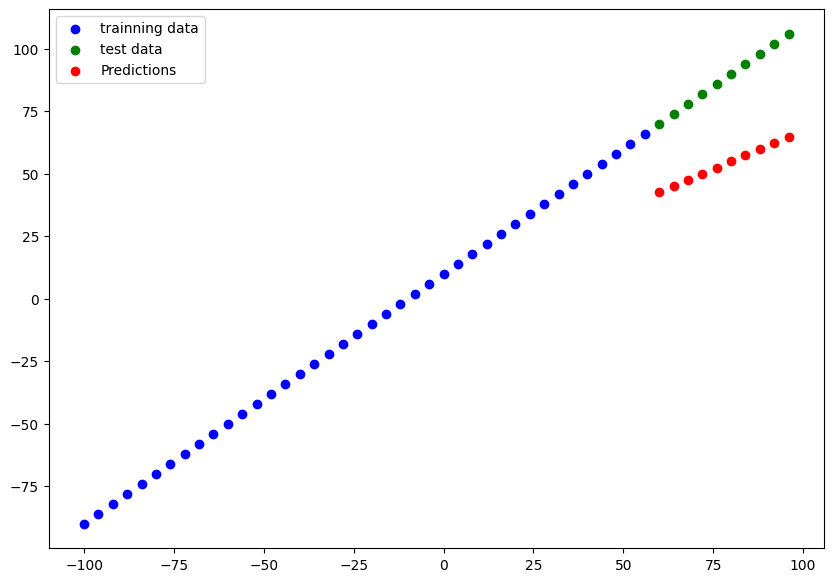

In [32]:
# make and plot prediction
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [57]:
# evaluation
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.28923416137695>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1196.137451171875>)

## Model 4

In [52]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1),
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


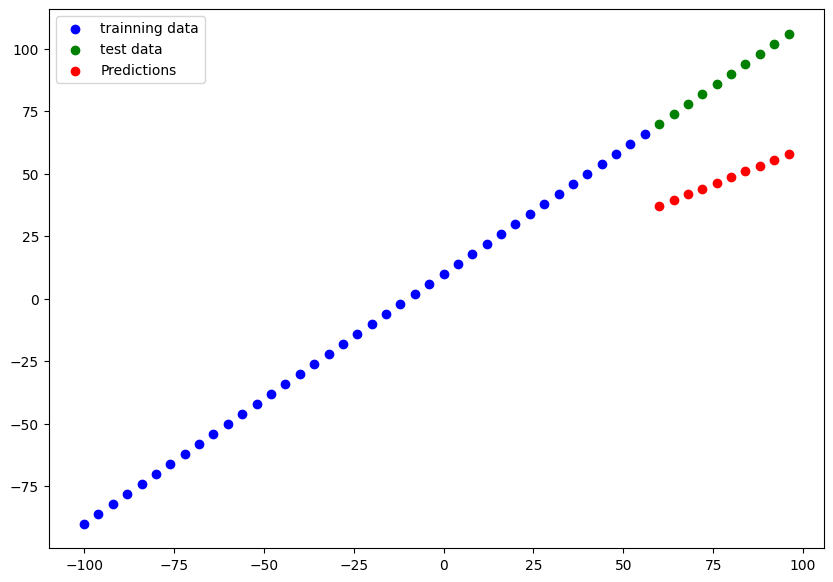

In [40]:
# make and plot prediction
y_preds_4 = model_4.predict(X_test)
plot_prediction(predictions=y_preds_4)

In [58]:
# evaluation
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=12.816198348999023>,
 <tf.Tensor: shape=(), dtype=float32, numpy=165.0723876953125>)

## Model 5

In [48]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1),
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])

model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


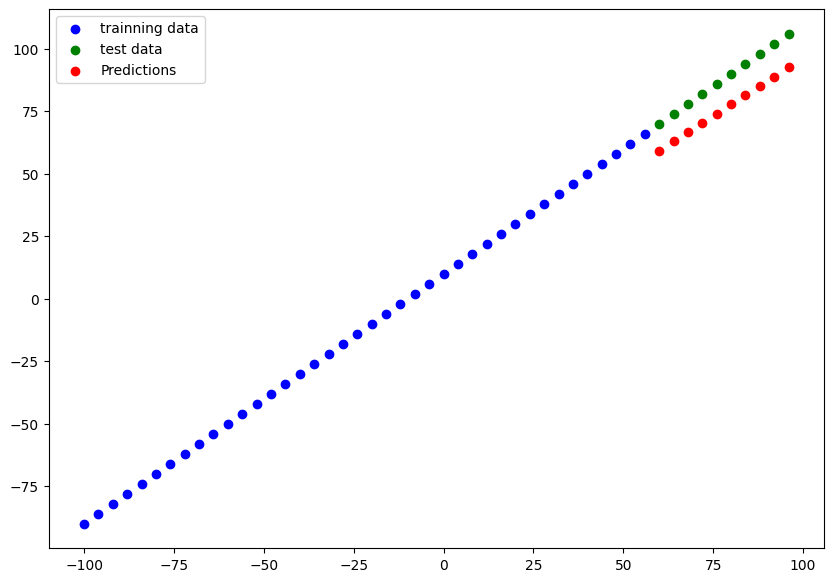

In [49]:
# make and plot prediction
y_preds_5 = model_5.predict(X_test)
plot_prediction(predictions=y_preds_5)

In [59]:
# evaluation
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=12.117609977722168>,
 <tf.Tensor: shape=(), dtype=float32, numpy=147.56541442871094>)

## Comparing the results of diff experiment

In [ ]:
# it's not actually effitiend to scroll up and down to compare evaluations
# LUCKily we have some our mae and mse

In [64]:
import pandas as pd

model_results = [
  ["model_1", mae_1.numpy(), mse_1.numpy()],
  ["model_2", mae_2.numpy(), mse_2.numpy()],
  ["model_3", mae_3.numpy(), mse_3.numpy()],
  ["model_4", mae_4.numpy(), mse_4.numpy()],
  ["model_5", mae_5.numpy(), mse_5.numpy()],
]

pd.DataFrame(model_results, columns=["model", "mae",  "mse"])

,model,mae,mse
0,model_1,13.253668,176.133911
1,model_2,42.337982,1818.074219
2,model_3,34.289234,1196.137451
3,model_4,12.816198,165.072388
4,model_5,12.117610,147.565414


In [65]:
# looks like model_4 is the best one
model_4.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (376.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://tensorboard.dev/) - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).